## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, ConfusionMatrixDisplay
import seaborn as sns

## File Path

In [3]:
#Dictrectory name and Filename
mypath='/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/'
count=0
for dn,_,fn in os.walk(mypath):
    for f in fn:
        count=count+len(os.path.join(dn,f))
print('Total Number of Samples both testing and training : ',count)

Total Number of Samples both testing and training :  3812778


In [4]:
mypath_train='/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/train'

In [5]:
#Dictrectory name and Filename
mypath='/kaggle/input/fruits-fresh-and-rotten-for-classification/'
count=0
for dn,_,fn in os.walk(mypath_train):
    for f in fn:
        count=count+len(os.path.join(dn,f))
print('Total Number of Samples both testing and training : ',count)

Total Number of Samples both testing and training :  1487020


In [6]:
labels=[]
for i in os.listdir(mypath_train):
    labels.append(i)
no_labels=len(labels)
print("No of labels : ",no_labels)
print("Labels : ",labels)

No of labels :  6
Labels :  ['rottenbanana', 'freshoranges', 'rottenoranges', 'freshbanana', 'rottenapples', 'freshapples']


In [7]:
mypath_test='/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/test'

In [8]:
#Dictrectory name and Filename
count=0
for dn,_,fn in os.walk(mypath_test):
    for f in fn:
        count=count+len(os.path.join(dn,f))
print('Total Number of Samples both testing and training : ',count)

Total Number of Samples both testing and training :  364973


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen_train = ImageDataGenerator(rescale=1./255.)
datagen_valid = ImageDataGenerator(rescale=1./255.)

In [10]:
SIZE=(150,150)

In [11]:
train_it = datagen_train.flow_from_directory(batch_size=32,
                                            directory=mypath_train,
                                            shuffle=True,
                                            classes=labels,
                                            target_size=SIZE, 
                                            class_mode='categorical')

valid_it = datagen_train.flow_from_directory( 
                                            batch_size=32,
                                            directory=mypath_train,
                                            shuffle=True,
                                            classes=labels,
                                            target_size=SIZE, 
                                            class_mode='categorical')

Found 10901 images belonging to 6 classes.
Found 10901 images belonging to 6 classes.


## CNN

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D,MaxPool2D
from keras.utils import np_utils

In [13]:
from keras.layers import Dense,Flatten,Dropout,BatchNormalization

In [14]:
model=Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape = (150,150,3)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

model.add(Dense(6, activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

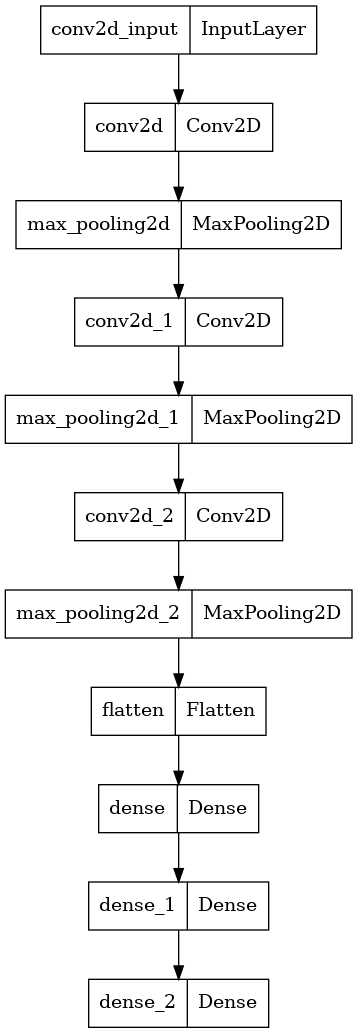

In [16]:
import tensorflow as tf
from keras.utils.vis_utils import plot_model
plot_model(model,show_shapes=False,show_dtype=False,show_layer_names=True,expand_nested=False)

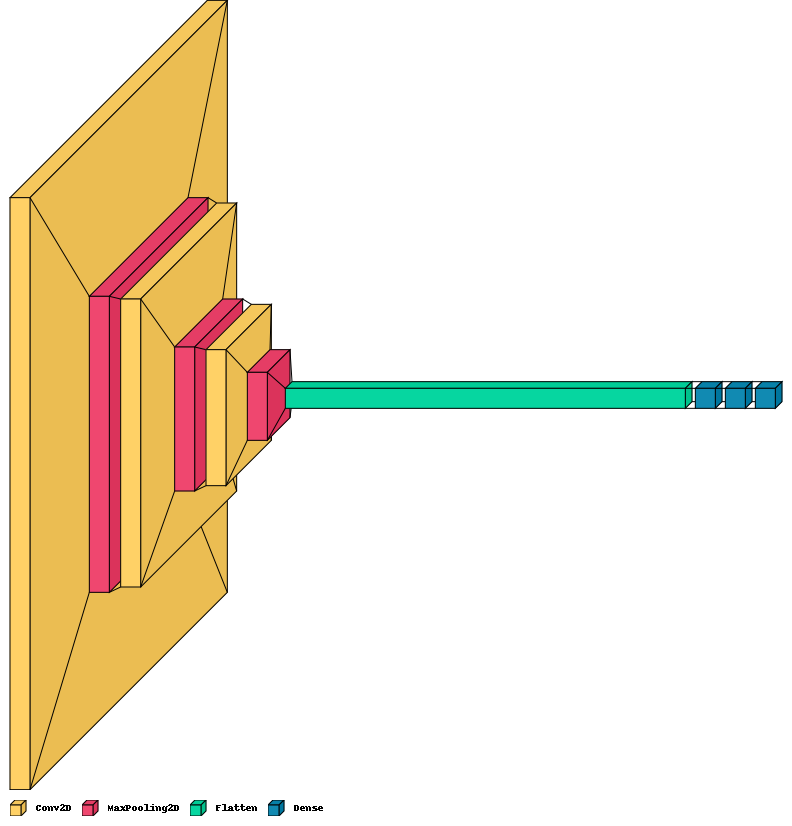

In [20]:
import visualkeras
visualkeras.layered_view(model,legend=True)

In [21]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

In [22]:
hist=model.fit(train_it,epochs=15,validation_data=valid_it)

Epoch 1/15
341/341 [==============================] - 193s 548ms/step - loss: 0.6326 - accuracy: 0.7616 - val_loss: 0.2789 - val_accuracy: 0.9031
Epoch 2/15
341/341 [==============================] - 114s 335ms/step - loss: 0.2498 - accuracy: 0.9066 - val_loss: 0.1544 - val_accuracy: 0.9487
Epoch 3/15
341/341 [==============================] - 110s 322ms/step - loss: 0.1662 - accuracy: 0.9381 - val_loss: 0.2168 - val_accuracy: 0.9138
Epoch 4/15
341/341 [==============================] - 113s 333ms/step - loss: 0.0988 - accuracy: 0.9657 - val_loss: 0.0739 - val_accuracy: 0.9704
Epoch 5/15
341/341 [==============================] - 113s 332ms/step - loss: 0.0917 - accuracy: 0.9679 - val_loss: 0.1806 - val_accuracy: 0.9473
Epoch 6/15
341/341 [==============================] - 109s 321ms/step - loss: 0.0709 - accuracy: 0.9750 - val_loss: 0.0232 - val_accuracy: 0.9923
Epoch 7/15
341/341 [==============================] - 110s 322ms/step - loss: 0.0368 - accuracy: 0.9875 - val_loss: 0.0270 -

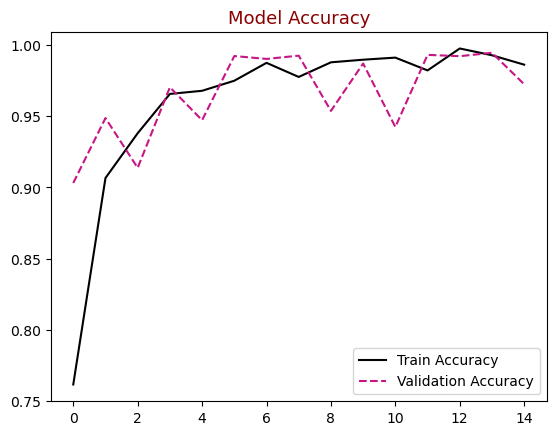

In [23]:
plt.figure()
plt.plot(hist.history["accuracy"],label="Train Accuracy",color="black")
plt.plot(hist.history["val_accuracy"],label="Validation Accuracy",color="mediumvioletred",linestyle="dashed",markeredgecolor="purple",markeredgewidth=2)
plt.title("Model Accuracy",color="darkred",size=13)
plt.legend()
plt.show()

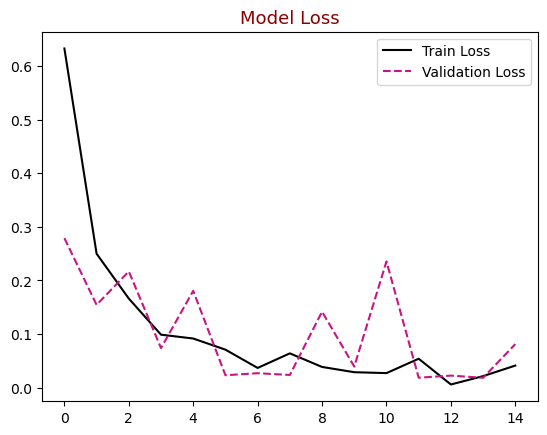

In [24]:
plt.figure()
plt.plot(hist.history["loss"],label="Train Loss",color="black")
plt.plot(hist.history["val_loss"],label="Validation Loss",color="mediumvioletred",linestyle="dashed",markeredgecolor="purple",markeredgewidth=2)
plt.title("Model Loss",color="darkred",size=13)
plt.legend()
plt.show()

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen_test=ImageDataGenerator(rescale=1./255.)

In [26]:
test_it = datagen_test.flow_from_directory(batch_size=1,
                                            directory=mypath_test,
                                            shuffle=False,
                                            classes=labels,
                                            target_size=SIZE, 
                                            class_mode='categorical')

Found 2698 images belonging to 6 classes.


## Predictions

In [27]:
model.evaluate(test_it)

2698/2698 [==============================] - 37s 14ms/step - loss: 0.1732 - accuracy: 0.9529


[0.1732100397348404, 0.9529280662536621]

In [28]:
model.predict(test_it)

2698/2698 [==============================] - 17s 6ms/step


array([[1.00000000e+00, 2.65580398e-19, 1.09204334e-08, 3.44779344e-10,
        1.57308611e-11, 9.89517845e-26],
       [1.00000000e+00, 7.62315235e-28, 1.01961191e-12, 6.35833502e-21,
        1.44987752e-15, 1.44723393e-33],
       [9.99935031e-01, 4.76297751e-11, 2.88620618e-06, 6.20675419e-05,
        3.98773592e-09, 1.13211565e-15],
       ...,
       [2.43495712e-09, 1.07726623e-06, 7.55913643e-09, 5.89069584e-03,
        1.46135560e-03, 9.92646813e-01],
       [3.11744103e-11, 1.20984450e-05, 1.44666645e-09, 2.42237136e-01,
        6.52627714e-05, 7.57685483e-01],
       [5.69731276e-11, 4.34720704e-09, 2.61935446e-10, 7.59937391e-10,
        3.00450502e-05, 9.99969959e-01]], dtype=float32)

## Performance Metrics

In [29]:
predictions=model.predict(test_it)
y_pred=[np.argmax(probas) for probas in predictions]
y_test=test_it.classes
class_names=test_it.class_indices.keys()

2698/2698 [==============================] - 17s 6ms/step


In [30]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, ConfusionMatrixDisplay
cmp=confusion_matrix(y_test,y_pred)
cmp

array([[523,   0,   0,   7,   0,   0],
       [  0, 370,   3,   0,  14,   1],
       [  1,  17, 361,   5,  19,   0],
       [  0,   0,   0, 379,   1,   1],
       [  1,   6,  15,   5, 569,   5],
       [  0,   5,   0,   1,  20, 369]])

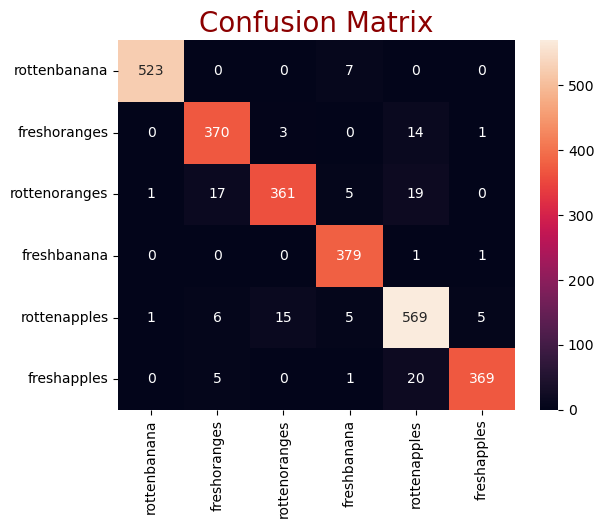

In [31]:
plt.figure()
sns.heatmap(cmp,xticklabels=labels,yticklabels=labels,annot=True,fmt='d')
plt.title("Confusion Matrix",color="darkred",size=20)
plt.show()

In [32]:
print("Accuracy Score : ",accuracy_score(y_test,y_pred))

Accuracy Score :  0.9529280948851001


In [33]:
model.save("fruits_model.hdf5")

In [35]:
model.save("fruits_model.h5")